# Haleema Sadia
# Task 6 Prediction Using Decision Tree
# lgmvip Data Science Internship July


In [102]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [103]:
# load data
data = pd.read_csv("iris.csv")

## Information About Dataset

In [104]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
# removing the id coloumn
data =data.drop(columns ='Id')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [107]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [109]:
#rename the name of coloumns
data = data.rename(columns ={"SepalLengthCm": "SepalLength","SepalWidthCm":"SepalWidth","PetalLengthCm":"PetalLength","PetalWidthCm":"PetalWidth"})

In [110]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [111]:
data.shape

(150, 5)

## Splitting The Dataset

In [112]:
#splitting the dataset
x = data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = data['Species']
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2, random_state=42)

## Training The model

In [113]:
model = DecisionTreeClassifier(criterion=  "entropy", random_state=1,splitter = "random", max_depth = 3,max_features ="sqrt")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       random_state=1, splitter='random')

## Visualizing The tree

[Text(0.375, 0.875, 'node #0\nPetalLength <= 1.983\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(0.25, 0.625, 'node #1\nentropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.625, 'node #2\nSepalLength <= 6.458\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(0.25, 0.375, 'node #3\nPetalWidth <= 1.669\nentropy = 0.964\nsamples = 54\nvalue = [0, 33, 21]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'node #4\nentropy = 0.422\nsamples = 35\nvalue = [0, 32, 3]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'node #5\nentropy = 0.297\nsamples = 19\nvalue = [0, 1, 18]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'node #6\nPetalLength <= 5.944\nentropy = 0.89\nsamples = 26\nvalue = [0, 8, 18]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'node #7\nentropy = 0.991\nsamples = 18\nvalue = [0, 8, 10]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'node #8\nentropy = 0.0\nsamples = 8\nval

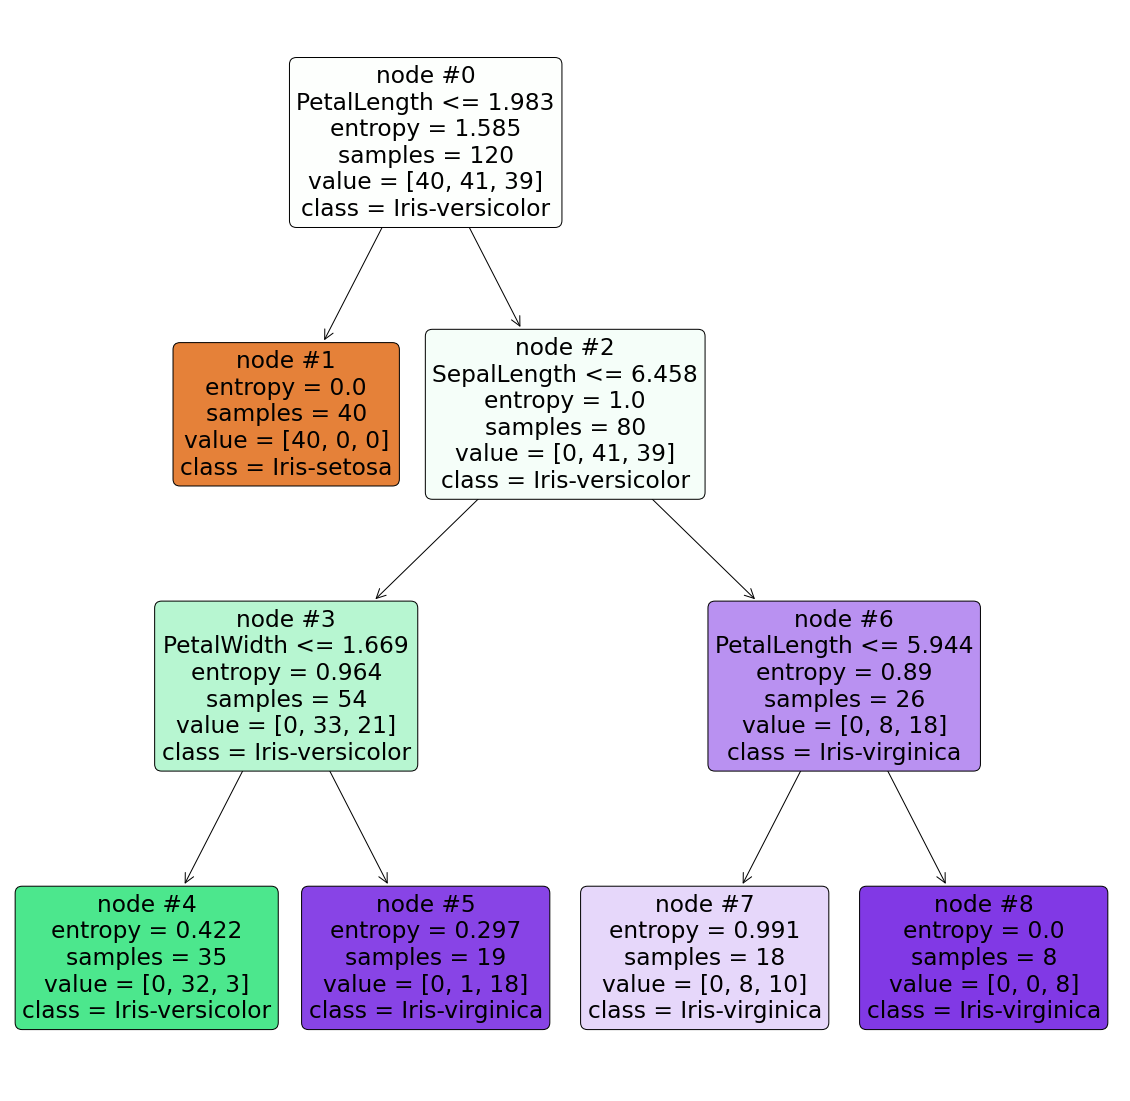

In [117]:
fig = plt.figure(figsize=(20, 20))
plot_tree(model,feature_names = data.columns.tolist(), rounded = True,filled= True,class_names =data['Species'].unique().tolist(),node_ids=True)

## Accuracy

In [118]:
predict = model.predict(x_test)
accuracy = accuracy_score(y_test , predict)
print(accuracy)

0.9666666666666667


In [120]:

# Assuming y_test and predict are your target variable and predicted values, respectively
report = classification_report(y_test, predict)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Plotting the learning curve to detect overfitting/underfitting

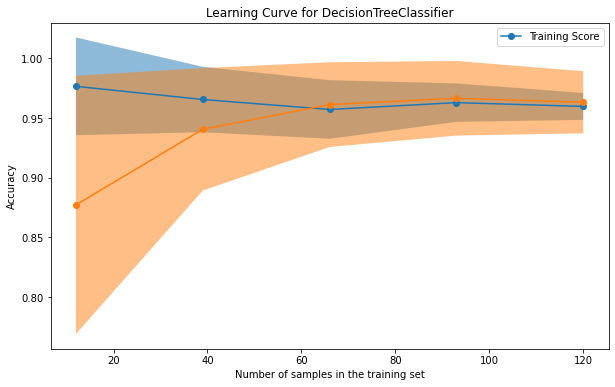

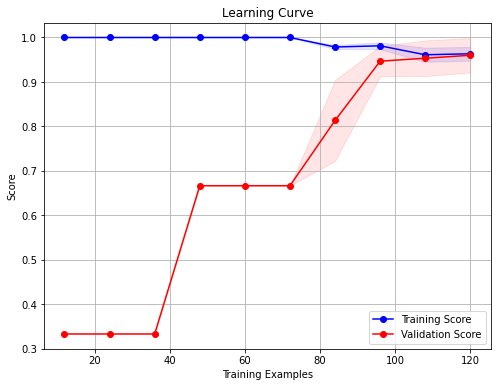

In [132]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
for ax_idx, estimator in enumerate([DecisionTreeClassifier(criterion= "entropy", random_state=1,splitter = "random", max_depth = 4,max_features ="sqrt")]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:1], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")
    
    
    
def plot_learning_curve(model, x, y, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(model, x, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='r', label='Validation Score')
    
    plt.legend(loc='best')
    plt.show()

# Assuming you have your features in X and target variable in y
# Create an instance of your model
model = DecisionTreeClassifier(criterion= "entropy", random_state=1,splitter = "random", max_depth = 4,max_features ="sqrt")


# Define the cross-validation strategy and training sizes
cv = 5  # Number of cross-validation folds
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the training set sizes

# Plot the learning curve
plot_learning_curve(model, x, y, cv, train_sizes)